## Final Project Submission

Please fill out:
* Student name: Aly (Aleigha Sardina-Spevack)
* Student pace: self paced
* Scheduled project review date/time: 1/29/2019 @ 6:30pm EST
* Instructor name: Eli 
* Blog post URL:



# Housing Prices in Kings County

## Can we build a model to predict the housing prices in Kings County California?

### Of course the answer to that question is 'Yes'!  It's why we're here.  So we'll go through, end to end, a data science model using the OSEMN framework to arrive at a formula to help predict the home prices.


## Starting off...

Here are the column name definitions.  It's a good idea to keep these nearby as a reference.  It'll help us cinceptualize what we are really working on.

### Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# A bit about OSEMN

OSEMN stands for Obtain, Scrub, Explore, Model, & iNterpret and this acronym provides us with the steps that we will take to create our Housing Price predictor.  It's a popular model and provides a good framework for working through a problem like this.  

## First things first...
A few libraries as well as the data itself must be loaded into the notebook.  

In [79]:
#Library imports and using the magic key for inline plotting in matplot
#this won't be everything that we need, but it's a good slection to start with
#later on as we need more specific tools we can add them at that time.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline 

## This is our 'Obtain' step

In this case, we already have a .csv file ready to go.  Life isn't always this easy, but today it is so we can use pandas to import our full dataset.

In [2]:
#loading .csv dataset into a dataframe
df = pd.read_csv('kc_house_data.csv')
#viewing header to ensure it loaded properly
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Here is where we start poking around a little to see what sort of data we have and getting a general of idea of the types of questions we need to ask. 

In [3]:
#getting a feel for the data by reviewing column names and looking at some info related to the values in each column/series
col_name = list(df.columns)
print(col_name)
df.info()

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 

## Data Cleaning or Scrubbing

Hmmm... looks a bit messy.  We can see why we need to 'scrub' around in here 


After a little bit of exploring, it looks like we have some 'dirt' in our data that we'll need to clean up.  We can start with converting date to a datetime type.  This will make performing any furture operations on the date easier. Waterfront data seems to be missing some values, as does year renovated and view.  Then we have a text column for sqft_basement which doesn't match our other column with above grade sqft.  We'll walk through each of these one by one to see how we can tidy up a bit. 

In [4]:
df.date.astype('datetime64')

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
5       2014-05-12
6       2014-06-27
7       2015-01-15
8       2015-04-15
9       2015-03-12
10      2015-04-03
11      2014-05-27
12      2014-05-28
13      2014-10-07
14      2015-03-12
15      2015-01-24
16      2014-07-31
17      2014-05-29
18      2014-12-05
19      2015-04-24
20      2014-05-14
21      2014-08-26
22      2014-07-03
23      2014-05-16
24      2014-11-20
25      2014-11-03
26      2014-06-26
27      2014-12-01
28      2014-06-24
29      2015-03-02
           ...    
21567   2014-06-10
21568   2014-12-02
21569   2014-08-28
21570   2014-10-15
21571   2015-03-05
21572   2014-11-13
21573   2014-09-10
21574   2014-05-14
21575   2014-10-02
21576   2015-04-16
21577   2015-03-17
21578   2014-10-17
21579   2014-10-31
21580   2014-08-13
21581   2015-04-21
21582   2014-10-13
21583   2014-09-15
21584   2014-10-15
21585   2015-04-07
21586   2014-06-26
21587   2014-08-25
21588   2015

In [80]:
#reviewing our basement data
df.sqft_basement.describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [81]:
#Checking to see how many unique values there are.  
#this could tell us if there is something about the data that may need to be fixed
df.sqft_basement.unique()

array([   0.,  400.,  910., 1530.,  730., 1700.,  300.,  970.,  760.,
        720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,  588.,
       1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,  500.,
       1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,  710.,
        840.,  380.,  770.,  480.,  570., 1490.,  620., 1250., 1270.,
        120.,  650.,  180., 1130.,  450., 1640., 1460., 1020., 1030.,
        750.,  640., 1070.,  490., 1310.,  630., 2000.,  390.,  430.,
        850.,  210., 1430., 1950.,  440.,  220., 1160.,  860.,  580.,
       2060., 1820., 1180.,  200., 1150., 1200.,  680.,  530., 1450.,
       1170., 1080.,  960.,  280.,  870., 1100.,  460., 1400.,  660.,
       1220.,  900.,  420., 1580., 1380.,  475.,  690.,  270.,  350.,
        935., 1370.,  980., 1470.,  160.,  950.,   50.,  740., 1780.,
       1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,  890.,
       1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800., 1120.,
       1810.,   60.,

Ah ha!  It looks like we've encountered a common problem.  A whole data series is represented as a string ebcause of one value.  In our case a '?'.  We should see how many '?'s there are before we move on.

In [7]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
480.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
          ...  
1481.0        1
143.0         1
266.0         1
2390.0        1
2300.0        1
65.0          1
2580.0        1
3480.0        1
2570.0        1
556.0         1
1281.0        1
792.0         1
1525.0        1
1913.0        1
2600.0        1
4130.0        1
2360.0        1
2310.0        1
1798.0        1
946.0         1
2490.0        1
1880.0        1
2190.0        1
862.0         1
295.0         1
176.0         1
225.0         1
2850.0        1
652.0         1
508.0         1
Name: sqft_basement, Len

There are 452 ? and 12798 0s.  Seems like basements aren't popular in Kings County.  Let's change our ? to 0's since 0 is the mode of the dataset by a very large margin.

In [8]:
#changing ? to 0.0 so our data set reads as a floating point number, eventually.
df['sqft_basement'] = df['sqft_basement'].replace('?', '0.0')

In [9]:
#looking at our data series again 
df.sqft_basement.describe()

count     21597
unique      303
top         0.0
freq      13280
Name: sqft_basement, dtype: object

In [10]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.

In [11]:
#Casting our column as a string
df['sqft_basement'] = df['sqft_basement'].astype('float64')

In [12]:
df.sqft_basement.describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

Looking good.  We'll have a bit more to do before we can wrap our heads around what our data looks like.  This is, however, an iterative process and we should expect mroe tidying do to after this first round.


In [13]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

Let's take care of that nan and make it a 0.0.

In [14]:
#We'll change all the nan to 0
df['yr_renovated'] = df.yr_renovated.fillna(0.0)

In [15]:
df.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [16]:
#Change the 0 value to 'NaN'
df['yr_renovated'] = df.yr_renovated.replace('NaN', 0)

In [17]:
df.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [82]:
#checking the dataframe again to see what it looks like now
#this is a good habit to get into, jsut to make sure evrything is doign what we expect it to
#Spoiler!  You'll see an example of why father down
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null object
condition        21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(8), object(3)
memory usage: 2.8+ MB


Much better!  Onto the waterfront series, let's see what that looks like.

In [19]:
df.waterfront.describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [20]:
df.waterfront.unique()

array([nan,  0.,  1.])

Not what I expected!  It looks like a categorical data set.  Either the property is on the waterfront or it's not, or the data is not available.  The problem here is that it is stored as a floating point number.  This can lead to some improper inferences regarding our data. Luckily this isn't too complicated to fix.  Shall we?

In [21]:
#making our nan into 0's consistent
df['waterfront'] = df.waterfront.fillna('0.0')
#Casting our column as a string
df['waterfront'] = df['waterfront'].astype('str')

In [22]:
#checking again to make sure this worked
df.waterfront.describe()

count     21597
unique        2
top         0.0
freq      21451
Name: waterfront, dtype: object

In [23]:
df.waterfront.unique()

array(['0.0', '1.0'], dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Better and better everytime.  We'll do a little bit more with that data series later, but for now we just have one more column to clean before we do some more exploring.

In [30]:
df.view.describe()

count     21597
unique        5
top         0.0
freq      19485
Name: view, dtype: object

In [26]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

Oh look, another category.  Looks like we're missing some data as well.  First, let's handle this the same way as the waterfront tag.  Then we'll see about the missing data.

In [27]:
#making our nan into 0's consistent
df['view'] = df.view.fillna('0.0')
#Casting our column as a string
df['view'] = df['view'].astype('str')

In [28]:
df.view.unique()

array(['0.0', '3.0', '4.0', '2.0', '1.0'], dtype=object)

In [29]:
df.view.describe()

count     21597
unique        5
top         0.0
freq      19485
Name: view, dtype: object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null object
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(3)
memory usage: 3.5+ MB


## Let's have a look-see!

Our initial cleaning is done so let's have a look at the data.  In my opinion this is the exciting part: where we learn enough about the data to start asking some fun questions.

## Time to go Explore!

I don't know about you, but exploring California sounds lik fun to me.

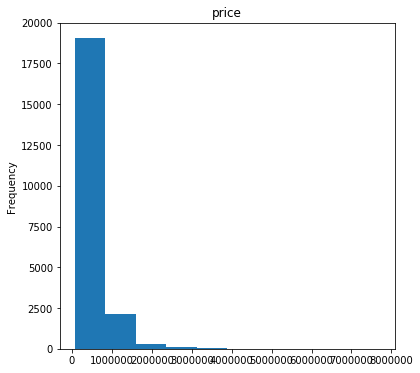

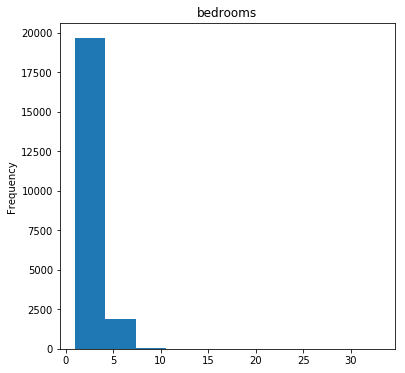

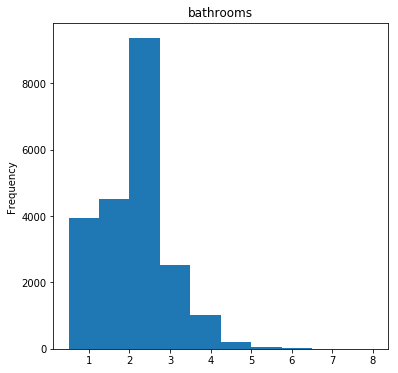

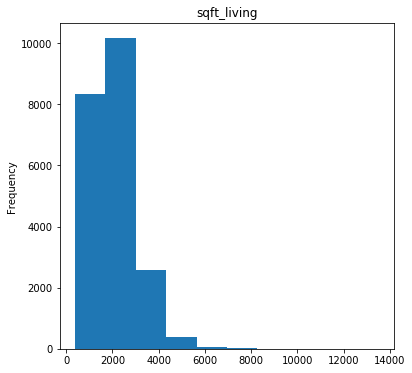

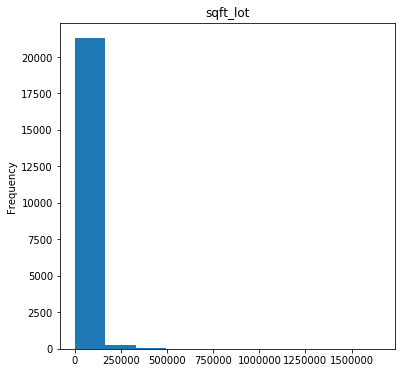

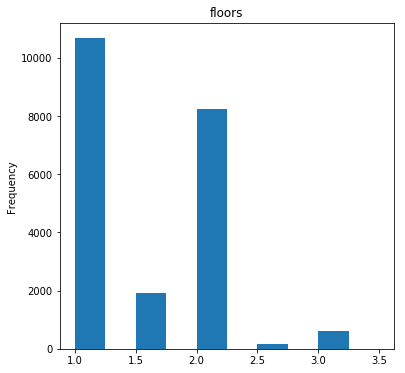

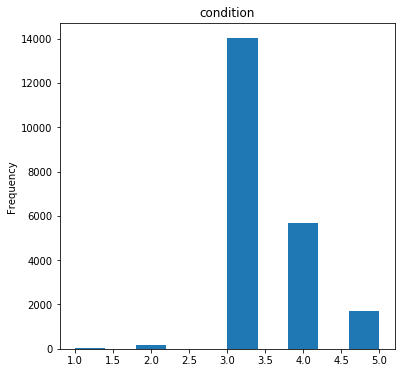

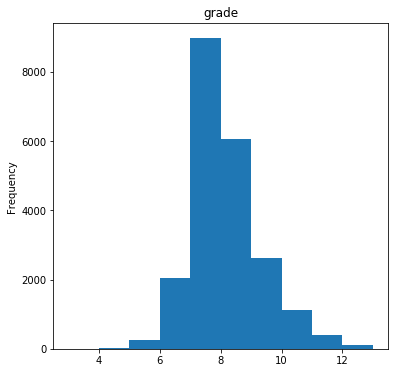

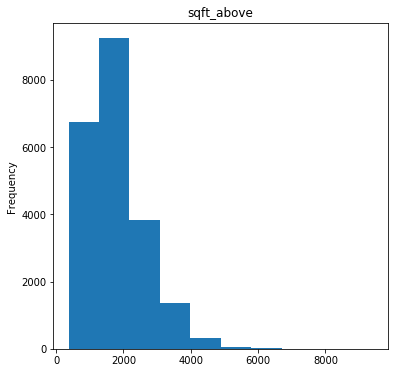

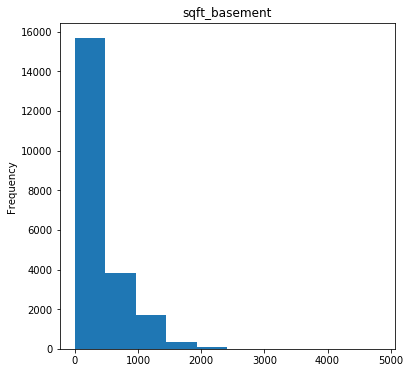

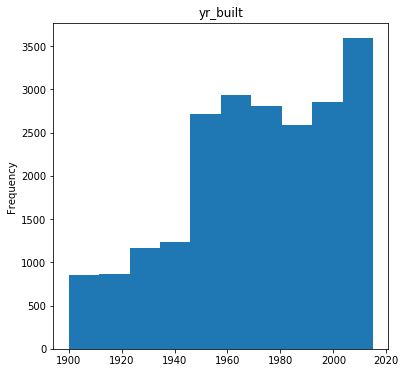

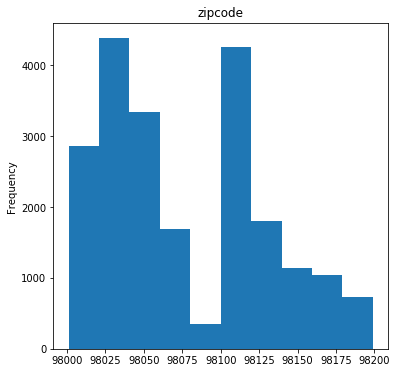

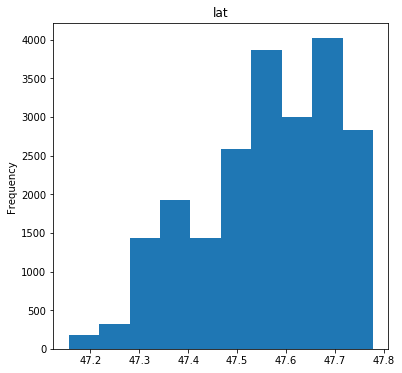

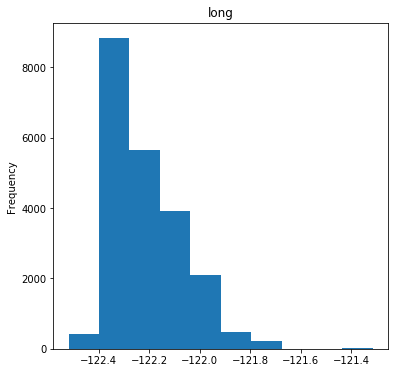

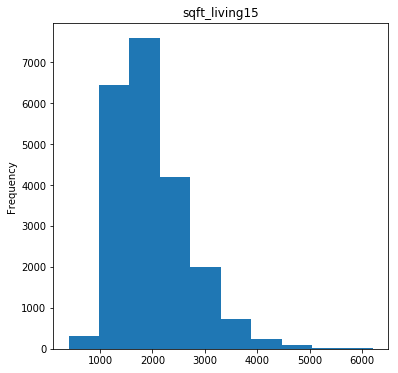

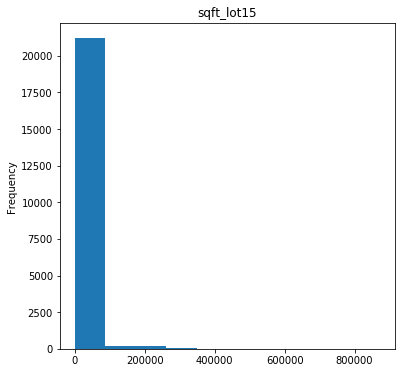

In [34]:
#using the col_name variable to build a for lopp to plot some histograms of our data to get a feel for the distributions
#first we'll need to update col_name to get rid of the columns that contain only strings: it'll make our for loop throw an error
#we're leaving out yr_renovated since this only applies to a portion of our data.
col_name =['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
           'condition', 'grade', 'sqft_above','sqft_basement','yr_built', 'zipcode', 
           'lat', 'long', 'sqft_living15', 'sqft_lot15']

for col in col_name:
    df[col].plot.hist( figsize= (6,6))
    plt.title(col)
    plt.show()

Yikes!  Most of these look like they have significant skew.  First we're going to take out floors and condition because they definitely aren't continuous variables.  Then we can try to noramlize these and add a kde plot to see if we can clean these up a bit and get a better picture.   I think we might have some additional non-continuous variables, but it'll be a clearer picture in a moment.

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


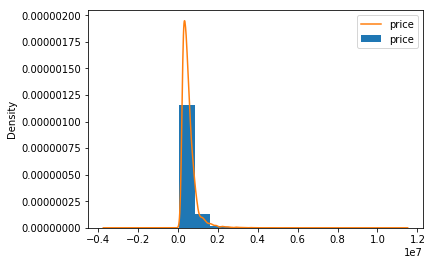

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


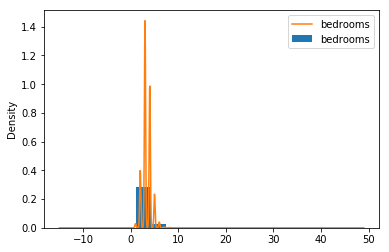

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


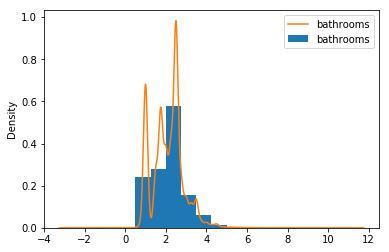

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


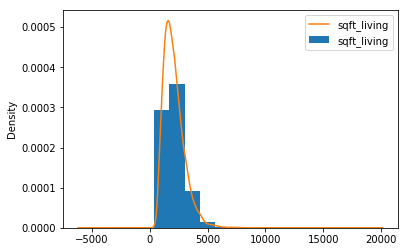

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


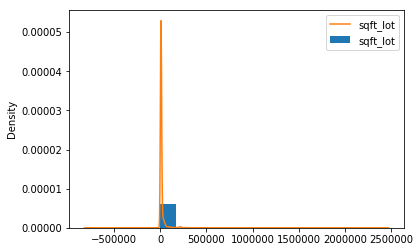

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


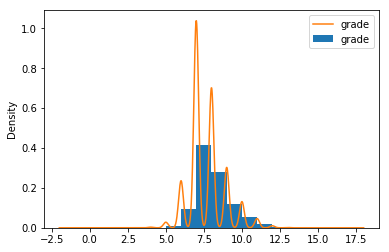

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


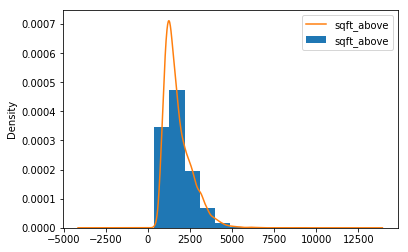

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


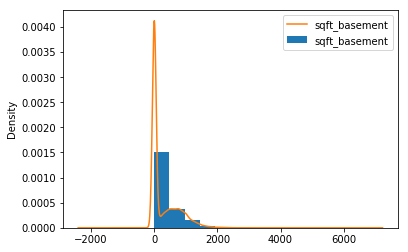

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


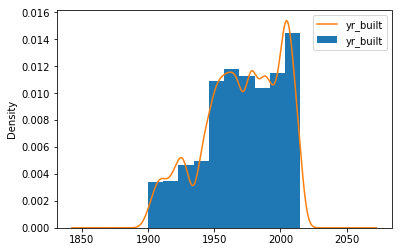

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


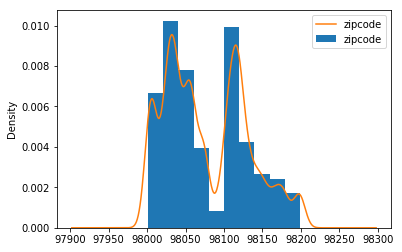

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


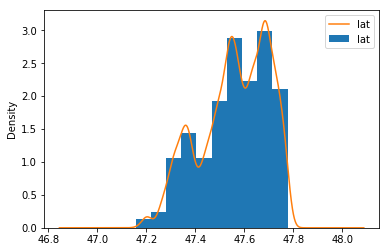

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


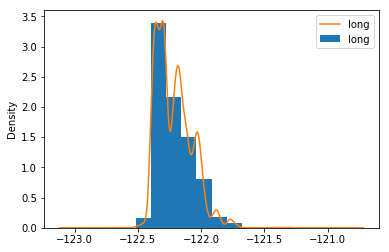

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


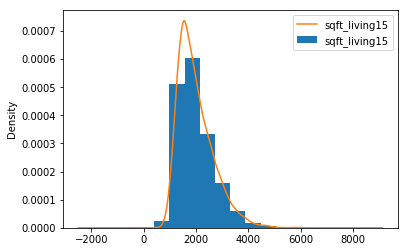

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


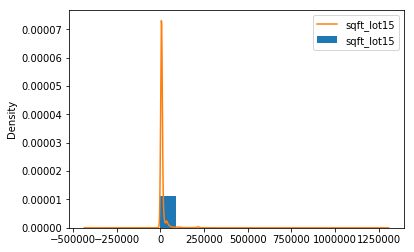

In [35]:
#Once again we'll use a for loop to iterate through each of the columns 
continuous = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',  'grade',
              'sqft_above','sqft_basement','yr_built', 'zipcode', 'lat', 'long', 
              'sqft_living15', 'sqft_lot15']

for col in continuous:
    df[col].plot.hist(normed=True)
    df[col].plot.kde(label=col)
    plt.legend()
    plt.show()


My hunch was proved correct.  Look at the orange line for grade, bedroom and bathroom.  Clearly these are not continuous.  We should handle these categories by so our eventual regression will function properly.  

Before we get to all that we should check for multicollinearity to ensure our analysis will be readable and clear.  It may actually save us some code, by telling us that we can remove some variables that we would have needed to cleaned or managed in another way.  


In [36]:
#let's look at a correlation matrix
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.036056,0.667951,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,-0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,-0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.008188,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,-0.146896,1.000000,0.756073,0.165843,0.447865,0.015623,-0.185771,0.113575,0.200341,0.713867,0.120981
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,-0.158904,0.756073,1.000000,-0.051175,0.424037,0.020645,-0.261570,-0.001199,0.344842,0.731767,0.195077


This is a big matrix, let's simplify this a little.

In [37]:
abs(df.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False


That's a little better.  It looks like number of bathrooms, grade, and square feet above grade are  highly correlated with squarefeet of living space.  I think we can make this even clearer though.

Let's look at a heat map.

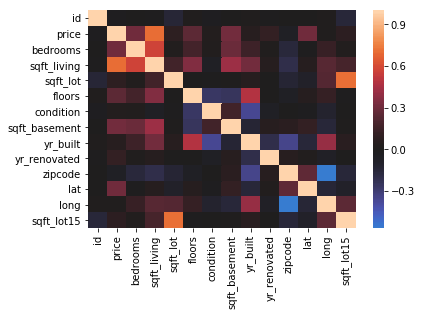

In [86]:
sns.heatmap(df.corr(), center=0);

I think I see another pairs with high collinearity; square feet of living space of the nearest 15 neighbors.  I think the best thing to do would be to create a copy of our data frame and drop some of the columns that are highly correlated.

This revealed another surprise: latitude and longitude aren't correlated with zipcode. 

In [89]:
#creating a dataframe copy
df_pred = df

#and as always checking out dataframe
df_pred.head()

,id,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1180,5650,1.0,0.0,0.0,3,0.0,1955,0.0,98178,47.5112,-122.257,5650
1,6414100192,12/9/2014,538000.0,3,2570,7242,2.0,0.0,0.0,3,400.0,1951,1991.0,98125,47.7210,-122.319,7639
2,5631500400,2/25/2015,180000.0,2,770,10000,1.0,0.0,0.0,3,0.0,1933,0.0,98028,47.7379,-122.233,8062
3,2487200875,12/9/2014,604000.0,4,1960,5000,1.0,0.0,0.0,5,910.0,1965,0.0,98136,47.5208,-122.393,5000
4,1954400510,2/18/2015,510000.0,3,1680,8080,1.0,0.0,0.0,3,0.0,1987,0.0,98074,47.6168,-122.045,7503


In [90]:
#dropping some correlated columns we're going to leave in square feet of the living space then get rid everything else.
for col in ['bathrooms','sqft_above','grade','sqft_living15']:
    df_pred.drop([col], axis=1, inplace = True)

KeyError: "['bathrooms'] not found in axis"

In [41]:
#checking our loop
df_pred.head()

,id,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1180,5650,1.0,0.0,0.0,3,0.0,1955,0.0,98178,47.5112,-122.257,5650
1,6414100192,12/9/2014,538000.0,3,2570,7242,2.0,0.0,0.0,3,400.0,1951,1991.0,98125,47.7210,-122.319,7639
2,5631500400,2/25/2015,180000.0,2,770,10000,1.0,0.0,0.0,3,0.0,1933,0.0,98028,47.7379,-122.233,8062
3,2487200875,12/9/2014,604000.0,4,1960,5000,1.0,0.0,0.0,5,910.0,1965,0.0,98136,47.5208,-122.393,5000
4,1954400510,2/18/2015,510000.0,3,1680,8080,1.0,0.0,0.0,3,0.0,1987,0.0,98074,47.6168,-122.045,7503


Now that our data is even cleaner time to handle categorical varibles.  Let's look at the cleaned up version of the dataframe and review our KDE plots and histograms again.

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


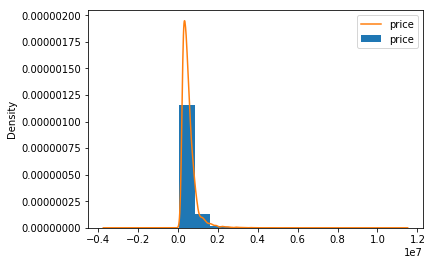

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


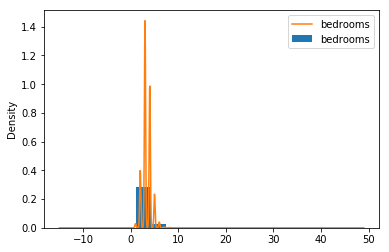

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


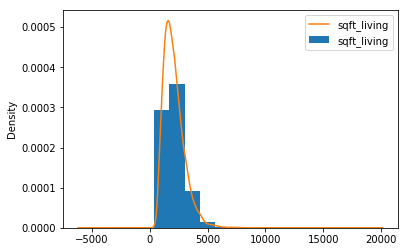

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


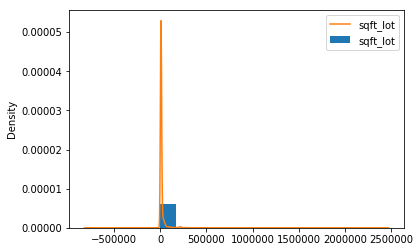

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


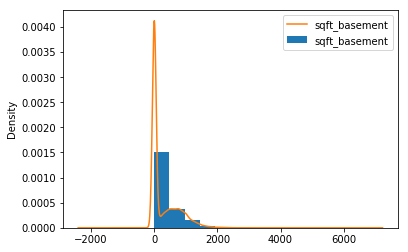

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


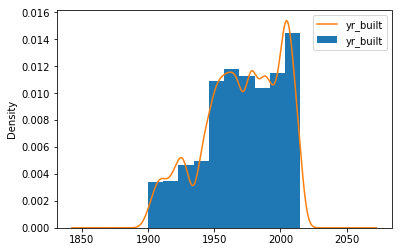

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


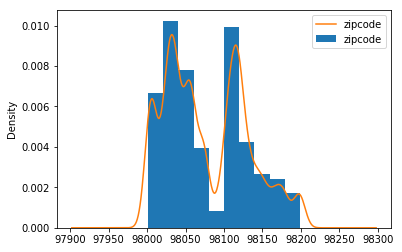

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


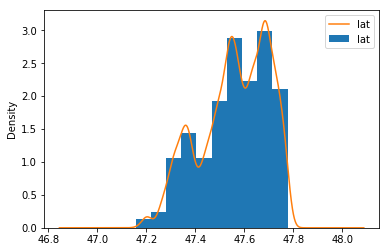

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


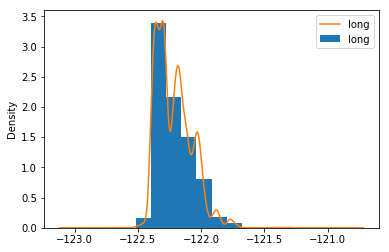

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


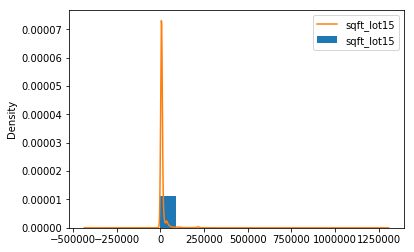

In [42]:
continuous2 = ['price', 'bedrooms', 'sqft_living', 'sqft_lot','sqft_basement','yr_built', 'zipcode', 'lat', 'long', 'sqft_lot15']

for col in continuous2:
    df[col].plot.hist(normed=True)
    df[col].plot.kde(label=col)
    plt.legend()
    plt.show()

Since we have categorical variables, we'll one-hot encode them.  The first one we'll look at is bedrooms.  Before we do that though, we'll import the encoder from scikit-learn to make our jobs easier.

In [43]:
#importing an additional tool from a popular stats library SciKitLearn
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [44]:
#First we'll convert bedrooms to a category then we can tranform it into a one-hot encoded dataframe
beds = df.bedrooms.astype('category')
beds_dummies = lb.fit_transform(beds)
# converting to a dataframe
beds_dum_df = pd.DataFrame(beds_dummies, columns=lb.classes_)

In [45]:
#checking our dataframe to ensure it worked
beds_dum_df.head()

,1,2,3,4,5,6,7,8,9,10,11,33
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0


33 bedrooms!  I wonder how many properties have 33 bedrooms.  That seems way like it might through our data off.  We can sum the column and if it's a low enough number we can remove it once we replace the columns in our actual dataframe.

In [46]:
#Here we remove the original column and add back the dummy encoded columns
bed_dum = pd.get_dummies(df['bedrooms'],prefix='bed')
df_pred = df_pred.drop(['bedrooms'], axis=1)
df_pred= pd.concat([df_pred,bed_dum], axis=1)
#checking our dataframe
df_pred.head()

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,...,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,bed_33
0,7129300520,10/13/2014,221900.0,1180,5650,1.0,0.0,0.0,3,0.0,...,1,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,400.0,...,1,0,0,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,770,10000,1.0,0.0,0.0,3,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,910.0,...,0,1,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,0.0,...,1,0,0,0,0,0,0,0,0,0


In [47]:
df_pred['bed_33'].sum()

1

Only one.  Somehow, either a mega mansion or a multifamily property snuck into out data.  Out it goes!

In [48]:
#removing the row that contains a one in our 'bed_33' column
df_pred.drop(df_pred[df_pred.bed_33 == 1].index, inplace=True)

In [49]:
# first we'll check out the column sum to ensure it's gone, then delete the whole column
df_pred['bed_33'].sum()

0

In [50]:
df_pred.drop(['bed_33'], axis=1, inplace=True)
df_pred.head()

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,...,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11
0,7129300520,10/13/2014,221900.0,1180,5650,1.0,0.0,0.0,3,0.0,...,0,1,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,400.0,...,0,1,0,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,770,10000,1.0,0.0,0.0,3,0.0,...,1,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,910.0,...,0,0,1,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,0.0,...,0,1,0,0,0,0,0,0,0,0


We'll want to convert condition to a categorical variable as well.

In [51]:
#Convering the next series to a category then we can tranform it into a one-hot encoded dataframe
condition = df.condition.astype('category')
condition_dummies = lb.fit_transform(condition)
#converting to a dataframe
condition_dum_df = pd.DataFrame(condition_dummies, columns=lb.classes_)
#Here we remove the original column and add back the dummy encoded columns
cond_dum = pd.get_dummies(df['condition'],prefix='condition')
df_pred = df_pred.drop(['condition'], axis=1)
df_pred= pd.concat([df_pred,cond_dum], axis=1)
#checking our dataframe
df_pred.head()

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,sqft_basement,yr_built,...,bed_7,bed_8,bed_9,bed_10,bed_11,condition_1,condition_2,condition_3,condition_4,condition_5
0,7.129301e+09,10/13/2014,221900.0,1180.0,5650.0,1.0,0.0,0.0,0.0,1955.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
1,6.414100e+09,12/9/2014,538000.0,2570.0,7242.0,2.0,0.0,0.0,400.0,1951.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
2,5.631500e+09,2/25/2015,180000.0,770.0,10000.0,1.0,0.0,0.0,0.0,1933.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
3,2.487201e+09,12/9/2014,604000.0,1960.0,5000.0,1.0,0.0,0.0,910.0,1965.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
4,1.954401e+09,2/18/2015,510000.0,1680.0,8080.0,1.0,0.0,0.0,0.0,1987.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0


Now that we have cleaned our data, we can get to the fun stuff...


# The Questions!

Here is our chance to come up with some conclusions about our data set.  There are a few things about real estate that everyone always talks about, so now we can see if our data backs up all that talk

## What is the single biggest impact on housing price?
     Is it really about location?
## How much does the size of the property matter?
     Do we think it's more about the number of rooms, the lot size, or the square footage?
## What is the impact of having a property on the waterfront?  
     Is this a big factor in housing price?  Does it really increase price like I think it would? 
     

## Finally we're ready to begin Modeling.

We're going to start building our model.  We're going to put our categorical variables as the predictor in our model so we'll run a few (one for each categorical variable).

As you will notice, our OSEMN process is iterative.  You can really see how we think through things that way in the modelling step.

In [91]:
#Creating a loop to look at each column in turn as a single predictor for housing price
col_names = df_pred.describe().columns.drop(['price','id'])
results=[['ind_var', 'r_squared','intercept', 'slope','p_value']]
for idx, val in enumerate(col_names):
    print("price~"+val)
    print("--------------------------")
    f = 'price~'+val
    model= smf.ols(formula =f, data=df_pred).fit()
    X_new = pd.DataFrame({val: [df_pred[val].min(), df_pred[val].max()]});
    preds= model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(results[idx+1])

price~bedrooms
--------------------------
['bedrooms', 0.09534970283730637, 127199.51268533088, 122464.44417420359, 0.0]
price~sqft_living
--------------------------
['sqft_living', 0.49268789904035104, -43988.89219422742, 280.8630143588748, 0.0]
price~sqft_lot
--------------------------
['sqft_lot', 0.008077735099594197, 528258.046513474, 0.7972846608151645, 5.57162202176598e-40]
price~floors
--------------------------
['floors', 0.06594805661983061, 279114.9959148346, 174809.0532796366, 0.0]
price~condition
--------------------------
['condition', 0.0013000622131944528, 470868.0489398099, 20361.313449484544, 1.1565566735107488e-07]
price~sqft_basement
--------------------------
['sqft_basement', 0.10311007135689387, 463664.13032957516, 268.21139643354616, 0.0]
price~yr_built
--------------------------
['yr_built', 0.002910962192005928, -789621.8059390178, 674.7430736386149, 2.117581295227859e-15]
price~yr_renovated
--------------------------
['yr_renovated', 0.013889854717611949, 532

In [53]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,sqft_living,0.492704,-44011.5,280.869,0
2,sqft_lot,0.00807828,528253,0.797311,5.5613e-40
3,floors,0.0659568,279085,174824,0
4,sqft_basement,0.103107,463664,268.21,0
5,yr_built,0.00291217,-789921,674.892,2.09274e-15
6,yr_renovated,0.0138905,532114,118.936,1.17987e-67
7,zipcode,0.00285249,3.65008e+07,-366.653,4.03409e-15
8,lat,0.0940571,-3.81352e+07,813192,0
9,long,0.000486077,7.57449e+06,57556.4,0.00119461


Shoot! our R-Squared Values are low.  Let's see if we can fix that by transforming our target (price!) into a log of itself.

In [54]:
#First we'll have a look at the log
np.log(df_pred['price']).describe()

count    21596.000000
mean        13.048196
std          0.526562
min         11.264464
25%         12.682307
50%         13.017003
75%         13.377006
max         15.856731
Name: price, dtype: float64

In [55]:
#converting that column of our dataframe to a log of itself and resaving that dataframe
pred_log = df_pred
pred_log['price'] = np.log(pred_log['price'])

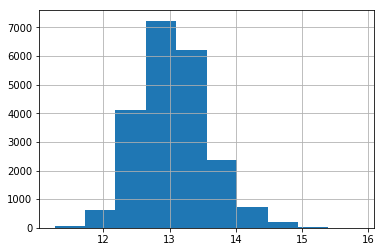

In [56]:
#looking at a histogram to see if taking the log improved the distibution
pred_log['price'].hist();

Whoa! what a difference!  Ok, so now we can repeat our OLS from above but this time using the log of price.

In [57]:
col_names = pred_log.describe().columns.drop(['price','id'])
results_log=[['ind_var', 'r_squared','intercept', 'slope','p_value']]
for idx, val in enumerate(col_names):
    print("Housing price~"+val)
    print("--------------------------")
    f = 'price~'+val
    model= smf.ols(formula =f, data=pred_log).fit()
    X_new = pd.DataFrame({val: [pred_log[val].min(), pred_log[val].max()]});
    preds= model.predict(X_new)
    results_log.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(results_log[idx+1])

Housing price~sqft_living
--------------------------
['sqft_living', 0.48331566140862225, 12.218727535882014, 0.0003987171709908483, 0.0]
Housing price~sqft_lot
--------------------------
['sqft_lot', 0.010006376255865534, 13.028990917082616, 1.2718792371564601e-06, 3.764072324702763e-49]
Housing price~floors
--------------------------
['floors', 0.0965124539748039, 12.59531239804665, 0.3031107924833689, 0.0]
Housing price~sqft_basement
--------------------------
['sqft_basement', 0.09803552619549805, 12.941099391746441, 0.00037485326679683535, 0.0]
Housing price~yr_built
--------------------------
['yr_built', 0.0064976944625944055, 10.200250552105047, 0.0014449235859750331, 1.8103234891138382e-32]
Housing price~yr_renovated
--------------------------
['yr_renovated', 0.011421899460955287, 13.03756669783876, 0.00015458354590799645, 6.883140662393567e-56]
Housing price~zipcode
--------------------------
['zipcode', 0.0015055511223619478, 50.493841062807284, -0.0003817947329004891, 1.17

In [58]:
pd.DataFrame(results_log)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,sqft_living,0.483316,12.2187,0.000398717,0
2,sqft_lot,0.0100064,13.029,1.27188e-06,3.76407e-49
3,floors,0.0965125,12.5953,0.303111,0
4,sqft_basement,0.0980355,12.9411,0.000374853,0
5,yr_built,0.00649769,10.2003,0.00144492,1.81032e-32
6,yr_renovated,0.0114219,13.0376,0.000154584,6.88314e-56
7,zipcode,0.00150555,50.4938,-0.000381795,1.17088e-08
8,lat,0.201443,-68.0768,1.70574,0
9,long,0.00258949,36.3188,0.190409,7.28877e-14


This looks much better.  This model has 25 variables though, and I think we can cut that down significantly.  We'll get rid of the poor predictors where R-Squared is less than 0.01 and we'll drop at least one column from each categorical variable.


In [59]:
print(pred_log.columns)

Index(['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_lot15', 'bed_1', 'bed_2', 'bed_3',
       'bed_4', 'bed_5', 'bed_6', 'bed_7', 'bed_8', 'bed_9', 'bed_10',
       'bed_11', 'condition_1', 'condition_2', 'condition_3', 'condition_4',
       'condition_5'],
      dtype='object')


In [60]:
house_final = pred_log
house_final = house_final.drop(["id",'yr_built',"zipcode","long",'sqft_lot15','bed_11','condition_5'],axis=1)
house_final.describe()

,price,sqft_living,sqft_lot,floors,sqft_basement,yr_renovated,lat,bed_1,bed_2,bed_3,...,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,condition_1,condition_2,condition_3,condition_4
count,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,...,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,13.048196,2080.343165,1.509983e+04,1.494119,285.702954,68.761391,47.560087,0.009076,0.127801,0.454899,...,0.074134,0.012595,0.001760,0.000602,0.000278,0.000139,0.001343,0.007871,0.649164,0.262861
std,0.526562,918.122038,4.141355e+04,0.539685,439.825454,364.045627,0.138552,0.094836,0.333876,0.497973,...,0.261995,0.111521,0.041911,0.024528,0.016666,0.011786,0.036620,0.088373,0.477243,0.440198
min,11.264464,370.000000,5.200000e+02,1.000000,0.000000,0.000000,47.155900,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.682307,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,47.471100,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.017003,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,47.571800,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,13.377006,2550.000000,1.068550e+04,2.000000,550.000000,0.000000,47.678000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,15.856731,13540.000000,1.651359e+06,3.500000,4820.000000,2015.000000,47.777600,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
#data check to make sure something wasn't introduced when we were working on our dataset
house_final.isna().sum()

date             1
price            1
sqft_living      1
sqft_lot         1
floors           1
waterfront       1
view             1
sqft_basement    1
yr_renovated     1
lat              1
bed_1            1
bed_2            1
bed_3            1
bed_4            1
bed_5            1
bed_6            1
bed_7            1
bed_8            1
bed_9            1
bed_10           1
condition_1      0
condition_2      0
condition_3      0
condition_4      0
dtype: int64

Ooops! We managed to get almost of a whole row with new na's.  I bet we can fix it by removing that row.  We can do this by setting the data frame equal to a single series that is all not null.  

Good thing we thought to check! 

In [62]:
house_final = house_final[house_final.date.notnull()]

In [63]:
house_final.isna().sum()

date             0
price            0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
sqft_basement    0
yr_renovated     0
lat              0
bed_1            0
bed_2            0
bed_3            0
bed_4            0
bed_5            0
bed_6            0
bed_7            0
bed_8            0
bed_9            0
bed_10           0
condition_1      0
condition_2      0
condition_3      0
condition_4      0
dtype: int64

And to make sure we still have enough data we'll have another look at the dataframe statistics

In [64]:
house_final.describe()

,price,sqft_living,sqft_lot,floors,sqft_basement,yr_renovated,lat,bed_1,bed_2,bed_3,...,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,condition_1,condition_2,condition_3,condition_4
count,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,...,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,13.048196,2080.343165,1.509983e+04,1.494119,285.702954,68.761391,47.560087,0.009076,0.127801,0.454899,...,0.074134,0.012595,0.001760,0.000602,0.000278,0.000139,0.001343,0.007872,0.649194,0.262873
std,0.526562,918.122038,4.141355e+04,0.539685,439.825454,364.045627,0.138552,0.094836,0.333876,0.497973,...,0.261995,0.111521,0.041911,0.024528,0.016666,0.011786,0.036621,0.088375,0.477233,0.440204
min,11.264464,370.000000,5.200000e+02,1.000000,0.000000,0.000000,47.155900,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.682307,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,47.471100,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.017003,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,47.571800,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,13.377006,2550.000000,1.068550e+04,2.000000,550.000000,0.000000,47.678000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,15.856731,13540.000000,1.651359e+06,3.500000,4820.000000,2015.000000,47.777600,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looks Great!  

Starting here to get to the best fit model that would answer our questions (which we will return to shortly), we can use feature ranking with recursive feature elimination on our dataset.  But before we do that we will spilt our data into two chunks; one for training our model and one for testing our model.  

In [65]:
#we have bunch of libraries and library features we will import here to do both our train-test split
#and to do the RFE(recursive feature elimination) for us; and finally importing the regression modeler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [66]:
#creating a matrix so that we can begin our rfe
#we have to take the date column out or our rfe function will throw errors
y = house_final[["price"]]
X = house_final.drop(['price', 'date'], axis=1)
X.head()

,sqft_living,sqft_lot,floors,waterfront,view,sqft_basement,yr_renovated,lat,bed_1,bed_2,...,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,condition_1,condition_2,condition_3,condition_4
0,1180.0,5650.0,1.0,0.0,0.0,0.0,0.0,47.5112,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1,2570.0,7242.0,2.0,0.0,0.0,400.0,1991.0,47.7210,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
2,770.0,10000.0,1.0,0.0,0.0,0.0,0.0,47.7379,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
3,1960.0,5000.0,1.0,0.0,0.0,910.0,0.0,47.5208,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,1680.0,8080.0,1.0,0.0,0.0,0.0,0.0,47.6168,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0


In [67]:
#we're going to do an 20/80 split ; 20% of the data to test the model and the rest to train it
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 3)

MSE_test=[]
MSE_train=[]
list_n= list(range(5,86,10))

for n in list_n:
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train,np.ravel(y_train))
    selected_columns = X.columns[select_n.support_]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train - yhat_train)**2)/len(y_train)
    mse_test = np.sum((y_test - yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
    MSE_test.append(mse_test)
    MSE_train.append(mse_test)

price    0.195293
dtype: float64
price    0.201116
dtype: float64
price    0.139723
dtype: float64
price    0.143612
dtype: float64
price    0.081644
dtype: float64
price    0.086271
dtype: float64
price    0.081644
dtype: float64
price    0.086271
dtype: float64
price    0.081644
dtype: float64
price    0.086271
dtype: float64
price    0.081644
dtype: float64
price    0.086271
dtype: float64
price    0.081644
dtype: float64
price    0.086271
dtype: float64
price    0.081644
dtype: float64
price    0.086271
dtype: float64
price    0.081644
dtype: float64
price    0.086271
dtype: float64


That is too many variables to really get a good sense of how they affect our model.  Additionally, with all the categorical varibles on-hot encoded, some of the test data would have columns with almsot all 0s.  You can imagine how that could negatively affect the accuracy of our model.  Maybe we should move to a model with fewer predictors.

In [68]:
#we're moving out of scikit and back to stats models so we'll need to import the relevant parts before we try agian
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [70]:
#running our regression model
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2314.
Date:                Sat, 26 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:36:49   Log-Likelihood:                -3705.8
No. Observations:               21596   AIC:                             7458.
Df Residuals:                   21573   BIC:                             7641.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -63.4748      0.743    -85.447      0.000     -64.931     -62.019
sqft_living       0.0004   3.34e-06    109.323      0.000       0.000       0.000
sqft_lot       2.123e-07   4.88e-08      4.347      0.000    1.17e-07    3.08e-07
floors            0.0819      0.005     17.990      0.000       0.073       0.091
waterfront        0.3210      0.026     12.402      0.000       0.270       0.372
view              0.0992      0.003     33.796      0.000       0.093       0.105
sqft_basement -4.302e-05   5.78e-06     -7.437      0.000   -5.44e-05   -3.17e-05
yr_renovated   8.056e-05   5.43e-06     14.841      0.000    6.99e-05    9.12e-05
lat               1.5857      0.014    109.901      0.000       1.557       1.614
bed_1             0.3024      0.288      1.049      0.294      -0.263       0.868
bed_2             0.3671      0.288      1.276      0.202      -0.197       0.931
bed_3             0.3454      0.288      1.201      0.230      -0.218       0.909
bed_4             0.3344      0.288      1.162      0.245      -0.229       0.898
bed_5             0.2861      0.288      0.995      0.320      -0.278       0.850
bed_6             0.1882      0.288      0.653      0.514      -0.377       0.753
bed_7             0.0281      0.291      0.096      0.923      -0.543       0.599
bed_8             0.2225      0.298      0.745      0.456      -0.363       0.808
bed_9             0.1561      0.311      0.503      0.615      -0.453       0.765
bed_10            0.1704      0.332      0.513      0.608      -0.481       0.821
condition_1      -0.3972      0.054     -7.361      0.000      -0.503      -0.291
condition_2      -0.3145      0.023    -13.532      0.000      -0.360      -0.269
condition_3      -0.1673      0.008    -22.095      0.000      -0.182      -0.152
condition_4      -0.0791      0.008     -9.912      0.000      -0.095      -0.063
==============================================================================
Omnibus:                      505.397   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1176.788
Skew:                           0.031   Prob(JB):                    2.91e-256
Kurtosis:                       4.142   Cond. No.                     2.24e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
model.params

const           -6.347476e+01
sqft_living      3.653585e-04
sqft_lot         2.122774e-07
floors           8.186126e-02
waterfront       3.209522e-01
view             9.916616e-02
sqft_basement   -4.302391e-05
yr_renovated     8.055501e-05
lat              1.585658e+00
bed_1            3.024123e-01
bed_2            3.671437e-01
bed_3            3.454343e-01
bed_4            3.343506e-01
bed_5            2.861354e-01
bed_6            1.881810e-01
bed_7            2.807839e-02
bed_8            2.224678e-01
bed_9            1.561241e-01
bed_10           1.703805e-01
condition_1     -3.971596e-01
condition_2     -3.145127e-01
condition_3     -1.672780e-01
condition_4     -7.908129e-02
dtype: float64

The bedrooms columns when they get to higher numbers of bedrooms are very rare values and they are throwing off our mosel.  We should get rid of these predictors and rerun our model. 

In [73]:
X = house_final.drop(['price', 'date', 'bed_1', 'bed_2', 'bed_3', 'bed_4', 
                      'bed_5', 'bed_6', 'bed_7', 'bed_8', 'bed_9', 'bed_10'], axis=1)

In [74]:
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     4197.
Date:                Sat, 26 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:54:04   Log-Likelihood:                -3791.3
No. Observations:               21596   AIC:                             7609.
Df Residuals:                   21583   BIC:                             7712.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -63.3349      0.684    -92.598      0.000     -64.676     -61.994
sqft_living       0.0004   2.88e-06    122.095      0.000       0.000       0.000
sqft_lot       2.458e-07   4.88e-08      5.033      0.000     1.5e-07    3.41e-07
floors            0.0824      0.005     18.067      0.000       0.074       0.091
waterfront        0.3286      0.026     12.665      0.000       0.278       0.379
view              0.1013      0.003     34.603      0.000       0.096       0.107
sqft_basement -4.933e-05   5.77e-06     -8.548      0.000   -6.06e-05    -3.8e-05
yr_renovated   7.924e-05   5.44e-06     14.560      0.000    6.86e-05    8.99e-05
lat               1.5904      0.014    110.538      0.000       1.562       1.619
condition_1      -0.4046      0.054     -7.481      0.000      -0.511      -0.299
condition_2      -0.3161      0.023    -13.568      0.000      -0.362      -0.270
condition_3      -0.1653      0.008    -21.778      0.000      -0.180      -0.150
condition_4      -0.0791      0.008     -9.883      0.000      -0.095      -0.063
==============================================================================
Omnibus:                      546.250   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.069
Skew:                           0.016   Prob(JB):                    1.51e-289
Kurtosis:                       4.215   Cond. No.                     1.54e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## iNterpreting the model we created

The coefficients for the  model we just created can be interpreted as follows:  how does the log of price change for each additional unit of X.  Where the X can be our predictors: the squarefeet of the living space, whether there is a waterfront on the property or how many floors the home has.  It's a little more complicated than using price un-trasformed but it worked much better for our model. As it stands now, our model explains about 70% of the variation in the log(price).  

### Finalizing The Model

I think we have a lot of variables here.  We can pick our top three and rerun the model to see if we can explain a good protion of the change in our home price while keeping things a little simpler.  Then we can make a formula for our model, that we can use on real world data!

In [92]:
#Another iteration of a regression
X = house_final.drop(['price', 'date', 'bed_1', 'bed_2', 'bed_3', 'bed_4', 
                      'bed_5', 'bed_6', 'bed_7', 'bed_8', 'bed_9', 'bed_10',
                     'sqft_basement', 'yr_renovated', 'sqft_lot','sqft_living',
                     'view', 'condition_1', 'condition_2', 'condition_3', 'condition_4'], axis=1)

In [76]:
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     3292.
Date:                Sun, 27 Jan 2019   Prob (F-statistic):               0.00
Time:                        11:50:13   Log-Likelihood:                -12725.
No. Observations:               21596   AIC:                         2.546e+04
Df Residuals:                   21592   BIC:                         2.549e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.3303      1.020    -65.035      0.000     -68.329     -64.331
floors         0.2787      0.006     50.589      0.000       0.268       0.289
waterfront     1.0930      0.036     30.164      0.000       1.022       1.164
lat            1.6601      0.021     77.386      0.000       1.618       1.702
==============================================================================
Omnibus:                     1278.961   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2087.536
Skew:                           0.482   Prob(JB):                         0.00
Kurtosis:                       4.179   Cond. No.                     1.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
model.params

const        -66.330262
floors         0.278657
waterfront     1.092981
lat            1.660105
dtype: float64

There we have it! we can look at the model below and plug in our values and get a predicted value for our housing prices!

### log(price) = 0.279*floors + 1.093*waterfront + 1.660*latitude - 66.330 

# Back to the Questions!

## What is the single biggest impact on housing price?
     Is it really about location?
     
   Why yes it is!  Turns out, Latitude had a big part to play in the variation amongst different housing prices.  I'm rather surprised that zipcode didn't have a bigger impact than latitude. 
     
## How much does the size of the property matter?
     Do we think it's more about the number of rooms, the lot size, or the square footage?
     
   Seems that size also matters a lot.  In our final model, the number of floors was a good predictor.  In our previous, more complicated model, we had a number of predictors realted to size, so we can assume that it plays a big role both in general and more specifically as the number of floors.  
     
     
## What is the impact of having a property on the waterfront?  
     Is this a big factor in housing price?  Does it really increase price like I think it would? 
     
   Well, this answer is also yes!  When I asked myself this question I thought perhaps that I might find there were other factors that are more important.  I am actually surprised at how large the coefficient is, though.  I guess these properties are really *that much more* desireable.  (I can certainly say I would want one!)

## And there we have it!

We followed the OSEMN process to clean, model, and interpret the Kings County Dataset.  We saw that each step was iterative, and that even as we progessed through the model, we went back to previous steps and moved on again.  

What we learned about the date through exploration and through the model itself, we can bring back to the business users and help them some forecasts or predictions using our model.  

## And if we had more time..

There are a number of things I would add if I had more time to work on this data.

1. Adding a map can help visualize some of the conclusions we made about location.
2. Taking another look at the dates of the sales.  We could try to see if prices are really higher in the summer when more people are looking to buy
3. Reviewing out scaling process and trying a different method to see if it gives us better results